Questão 1)

Acurácia do modelo: 1.00


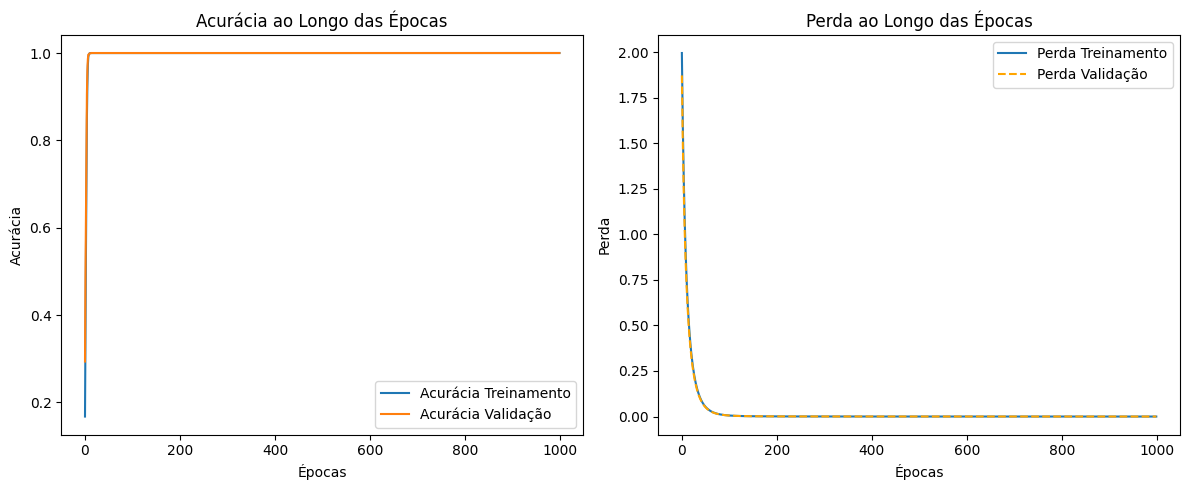

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Definindo os vértices do cubo (padrões)
vertices = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

# Gerando dados com ruído
np.random.seed(42)  # para reprodutibilidade
n_samples = 1000
data = []
labels = []

for i, vertex in enumerate(vertices):
    amostras_ruidosas = vertex + 0.1 * np.random.randn(n_samples, 3)
    data.append(amostras_ruidosas)
    labels.append([i] * n_samples)

data = np.vstack(data)
labels = np.hstack(labels)

# Dividindo os dados
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
indice_divisao = int(0.8 * data.shape[0])
X_treino, X_validacao = data[indices[:indice_divisao]], data[indices[indice_divisao:]]
y_treino, y_validacao = labels[indices[:indice_divisao]], labels[indices[indice_divisao:]]

# Criando e treinando o Perceptron
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=8, activation='sigmoid', input_shape=(3,))
])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(X_treino, y_treino, epochs=1000, validation_data=(X_validacao, y_validacao), verbose=0)

# Avaliando o modelo
perda, acuracia = modelo.evaluate(X_validacao, y_validacao, verbose=0)
print(f"Acurácia do modelo: {acuracia:.2f}")

# Plotando os gráficos
plt.figure(figsize=(12, 5))

# Gráfico da acurácia
plt.subplot(1, 2, 1)
plt.plot(historico.history['accuracy'], label='Acurácia Treinamento')
plt.plot(historico.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Gráfico da perda
plt.subplot(1, 2, 2)
plt.plot(historico.history['loss'], label='Perda Treinamento')
plt.plot(historico.history['val_loss'], label='Perda Validação', linestyle='--', color='orange')  # Adicione linestyle e color
plt.title('Perda ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.tight_layout()
plt.show()



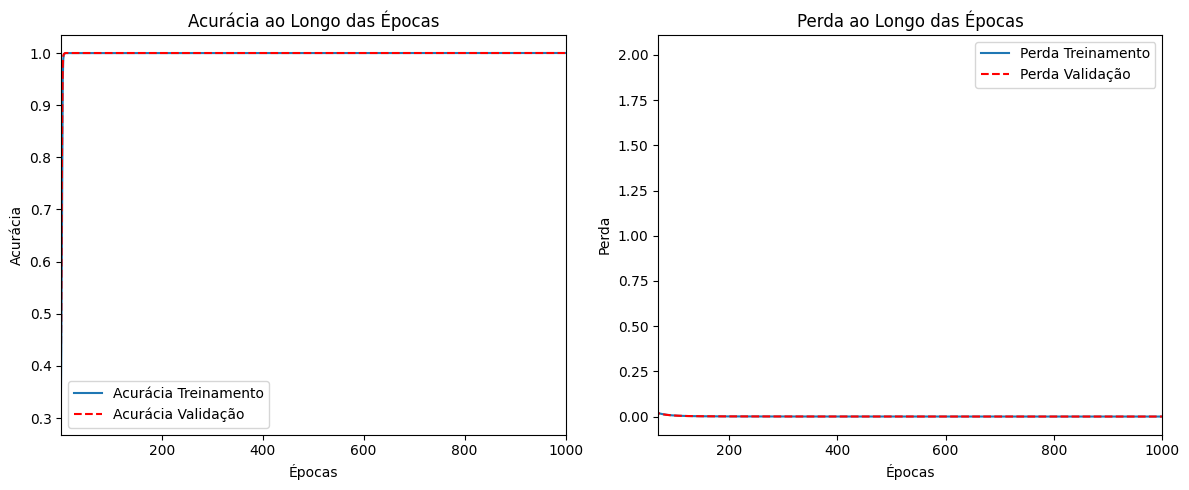

In [ ]:
# Plotando os gráficos
plt.figure(figsize=(12, 5))

# Gráfico da acurácia
plt.subplot(1, 2, 1)
plt.plot(historico.history['accuracy'], label='Acurácia Treinamento')
plt.plot(historico.history['val_accuracy'], 'r--', label='Acurácia Validação')  # Linha pontilhada
plt.title('Acurácia ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.xlim(1, 1000)  # Começando a partir da época 1
plt.legend()

# Gráfico da perda
plt.subplot(1, 2, 2)
plt.plot(historico.history['loss'], label='Perda Treinamento')
plt.plot(historico.history['val_loss'], 'r--', label='Perda Validação')
plt.title('Perda ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.xlim(70, 1000)  # Começando a partir da época 1
plt.legend()

plt.tight_layout()
plt.show()

Questão 2)

a)

In [1]:
# Importando as bibliotecas necessárias
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Dados para a função XOR
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Construindo o modelo para XOR
model_xor = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(2,)),
    keras.layers.Dense(1, activation='sigmoid')
])

model_xor.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_xor.fit(X_xor, y_xor, epochs=5000, verbose=0)

# Avaliando o modelo XOR
accuracy_xor = model_xor.evaluate(X_xor, y_xor, verbose=0)[1]
print(f"Acurácia do modelo XOR: {accuracy_xor:.2f}")


Acurácia do modelo XOR: 1.00


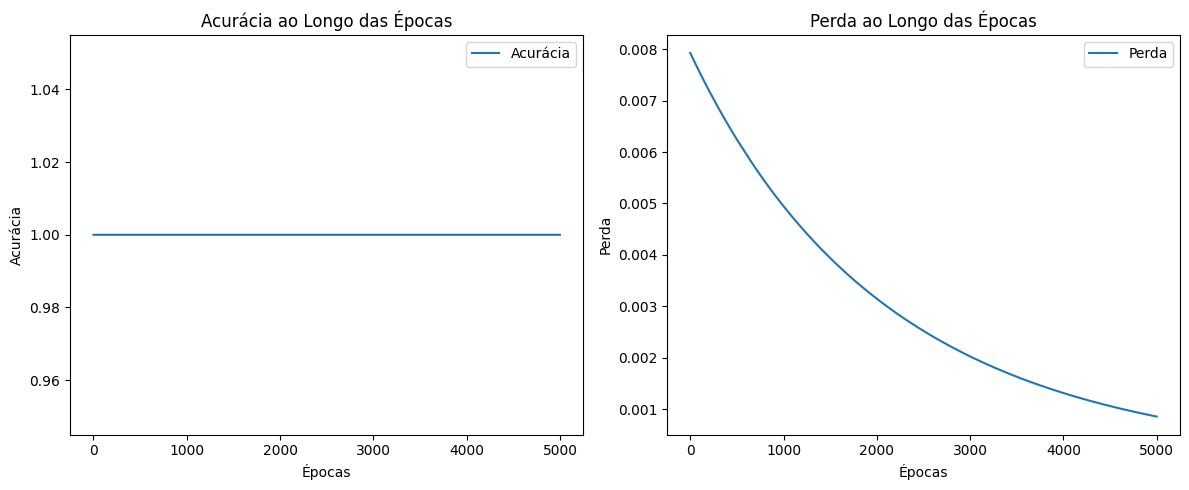

In [ ]:
import matplotlib.pyplot as plt

# Capturando o histórico do treinamento
history_xor = model_xor.fit(X_xor, y_xor, epochs=5000, verbose=0)

# Plotando os gráficos
plt.figure(figsize=(12, 5))

# Gráfico da acurácia
plt.subplot(1, 2, 1)
plt.plot(history_xor.history['accuracy'], label='Acurácia')
plt.title('Acurácia ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Gráfico da perda
plt.subplot(1, 2, 2)
plt.plot(history_xor.history['loss'], label='Perda')
plt.title('Perda ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.tight_layout()
plt.show()


b)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
# Gerando dados para a função log10
X_log = np.linspace(1, 10, 400).reshape(-1, 1)
y_log = np.log10(X_log).reshape(-1, 1)

# Construindo o modelo para log10
model_log = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    keras.layers.Dense(1)
])

model_log.compile(optimizer='adam', loss='mean_squared_error')
model_log.fit(X_log, y_log, epochs=2000, verbose=0, validation_split=0.2)

# Avaliando o modelo log10
loss_log = model_log.evaluate(X_log, y_log, verbose=0)
print(f"Erro quadrático médio para log10: {loss_log:.4f}")


Erro quadrático médio para log10: 0.0067


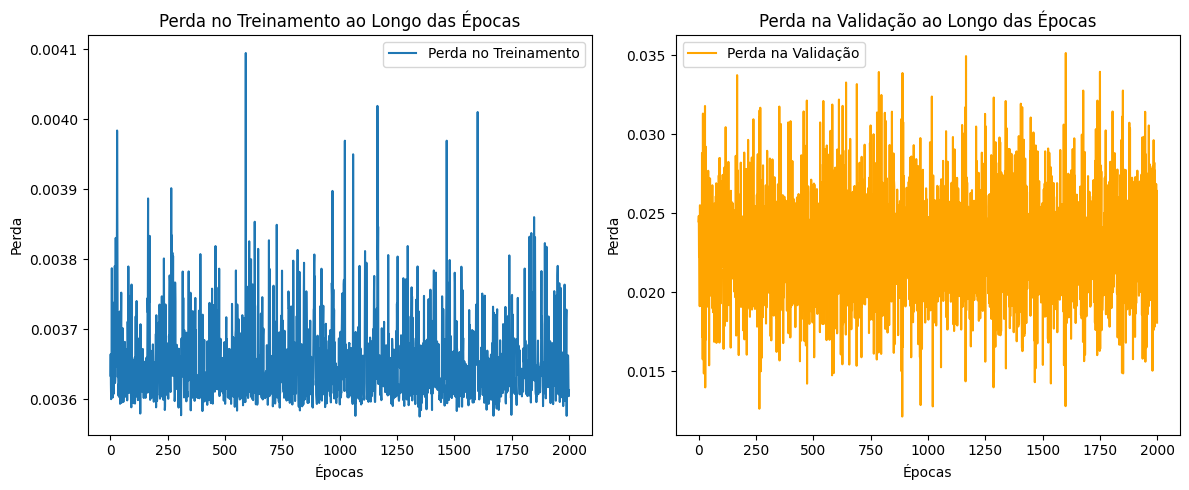

In [ ]:
import matplotlib.pyplot as plt

# Capturando o histórico do treinamento
history_log = model_log.fit(X_log, y_log, epochs=2000, verbose=0, validation_split=0.2)

# Plotando os gráficos
plt.figure(figsize=(12, 5))

# Gráfico da perda no conjunto de treinamento
plt.subplot(1, 2, 1)
plt.plot(history_log.history['loss'], label='Perda no Treinamento')
plt.title('Perda no Treinamento ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Gráfico da perda no conjunto de validação
plt.subplot(1, 2, 2)
plt.plot(history_log.history['val_loss'], label='Perda na Validação', color='orange')
plt.title('Perda na Validação ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.tight_layout()
plt.show()


c)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Definindo a função f(x)
def f(x):
    return 10*x**5 + 5*x**4 + 2*x**3 - 0.5*x**2 + 3*x + 2

# Gerando valores de x no intervalo [0, 20]
x_values = np.linspace(0, 10, 400).reshape(-1, 1)
y_values = f(x_values)

# Normalizando os dados
x_mean, x_std = x_values.mean(), x_values.std()
y_mean, y_std = y_values.mean(), y_values.std()

x_values = (x_values - x_mean) / x_std
y_values = (y_values - y_mean) / y_std

# Dividindo os dados em treinamento e validação
indices = np.arange(len(x_values))
np.random.shuffle(indices)

train_size = int(0.8 * len(x_values))
train_indices = indices[:train_size]
val_indices = indices[train_size:]

x_train, y_train = x_values[train_indices], y_values[train_indices]
x_val, y_val = x_values[val_indices], y_values[val_indices]

# Construindo o modelo
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compilando o modelo
model.compile(optimizer='adam', loss='mse')

# Treinando o modelo
model.fit(x_train, y_train, epochs=5000, validation_data=(x_val, y_val), verbose=0)

# Avaliando o modelo
mse = model.evaluate(x_val, y_val, verbose=0)
print(f"Erro Quadrático Médio: {mse}")


Erro Quadrático Médio: 2.2661235561827198e-05


63/63 [==============================] - 0s 1ms/step


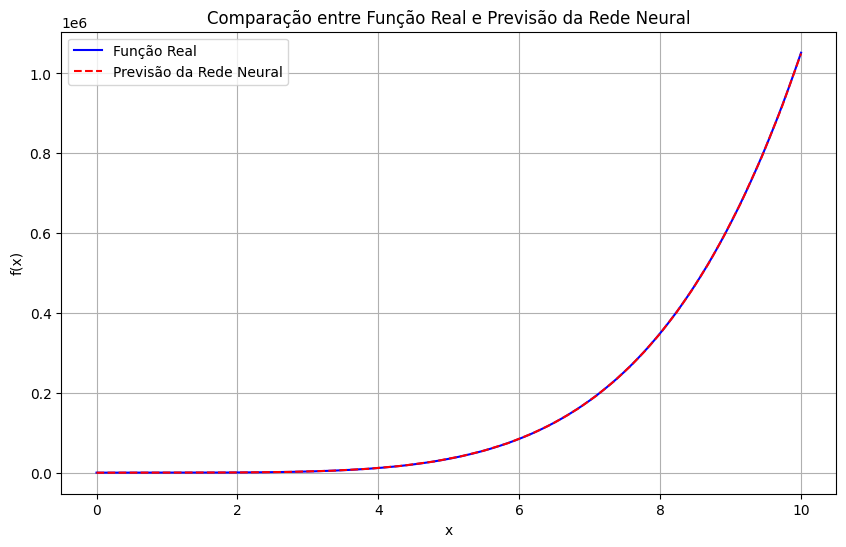

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Definindo a função f(x)
def f(x):
    return 10*x**5 + 5*x**4 + 2*x**3 - 0.5*x**2 + 3*x + 2

# Gerando valores de x no intervalo [0, 20]
x_values = np.linspace(0, 10, 2000).reshape(-1, 1)
y_values = f(x_values)

# Normalizando os dados
x_mean, x_std = x_values.mean(), x_values.std()
y_mean, y_std = y_values.mean(), y_values.std()

x_values_normalized = (x_values - x_mean) / x_std

# Construindo o modelo
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compilando o modelo
model.compile(optimizer='adam', loss='mse')

# Treinando o modelo
model.fit(x_values_normalized, (y_values - y_mean) / y_std, epochs=5000, verbose=0)

# Predizendo os valores com o modelo treinado
y_pred_normalized = model.predict(x_values_normalized)
y_pred = y_pred_normalized * y_std + y_mean

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Função Real', color='blue')
plt.plot(x_values, y_pred, label='Previsão da Rede Neural', color='red', linestyle='--')
plt.title('Comparação entre Função Real e Previsão da Rede Neural')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


Questão 3)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função de ativação e sua derivada
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Gerar dados aleatórios
np.random.seed(42)
n_samples = 1000
data = np.random.rand(n_samples, 2) * 2 - 1  # valores entre -1 e 1
labels = []

for x, y in data:
    if abs(x) + abs(y) < 1:  # dentro do losango
        if x > 0 and y > 0:
            labels.append(0)  # C1
        elif x < 0 and y > 0:
            labels.append(1)  # C2
        elif x < 0 and y < 0:
            labels.append(2)  # C3
        else:
            labels.append(3)  # C4
    else:  # fora do losango, mas dentro do círculo
        if x > 0 and y > 0:
            labels.append(4)
        elif x < 0 and y > 0:
            labels.append(5)
        elif x < 0 and y < 0:
            labels.append(6)
        else:
            labels.append(7)

labels = np.array(labels).reshape(-1, 1)

# One-hot encoding das labels
one_hot_labels = np.zeros((n_samples, 8))
for i in range(n_samples):
    one_hot_labels[i, labels[i]] = 1

# Dividir os dados em treinamento e validação
split = int(0.8 * n_samples)
X_train, X_val = data[:split], data[split:]
y_train, y_val = one_hot_labels[:split], one_hot_labels[split:]

# Parâmetros da rede
input_size = 2
hidden_size = 64
output_size = 8
lr = 0.01
epochs = 5000

# Inicialização dos pesos e biases
w1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
w2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Treinamento
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X_train, w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)

    # Backward pass
    loss = y_train - a2
    dz2 = loss * sigmoid_derivative(a2)
    dw2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0)
    dz1 = np.dot(dz2, w2.T) * sigmoid_derivative(a1)
    dw1 = np.dot(X_train.T, dz1)
    db1 = np.sum(dz1, axis=0)

    # Atualização dos pesos e biases
    w1 += lr * dw1
    b1 += lr * db1
    w2 += lr * dw2
    b2 += lr * db2

# Avaliação
z1_val = np.dot(X_val, w1) + b1
a1_val = sigmoid(z1_val)
z2_val = np.dot(a1_val, w2) + b2
a2_val = sigmoid(z2_val)

predictions = np.argmax(a2_val, axis=1)
true_labels = np.argmax(y_val, axis=1)

# Matriz de confusão
confusion = np.zeros((8, 8))
for i in range(len(predictions)):
    confusion[true_labels[i], predictions[i]] += 1

print("Matriz de Confusão:")
print(confusion)


Matriz de Confusão:
[[33.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 21.  1.  0.  0.  0.  0.  0.]
 [ 0.  0. 26.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 24.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 22.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 25.  0.]
 [ 0.  0.  0. 22.  0.  0.  0.  1.]]


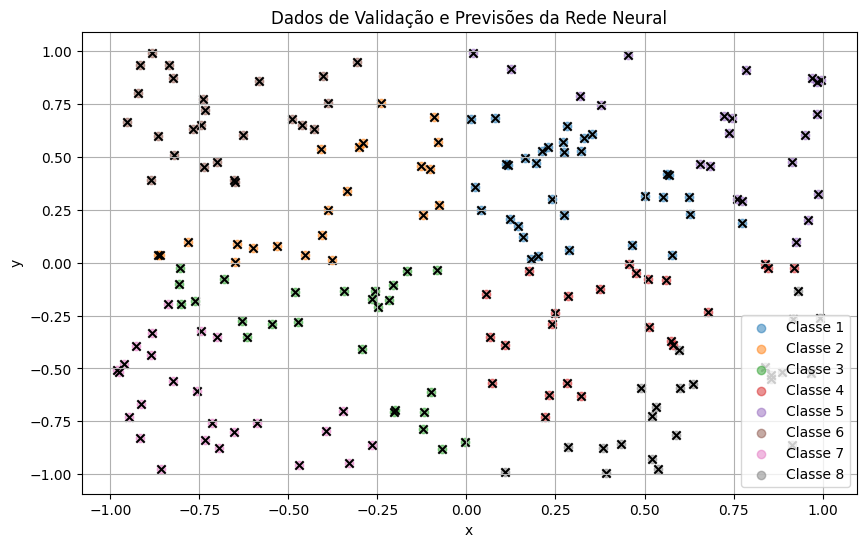

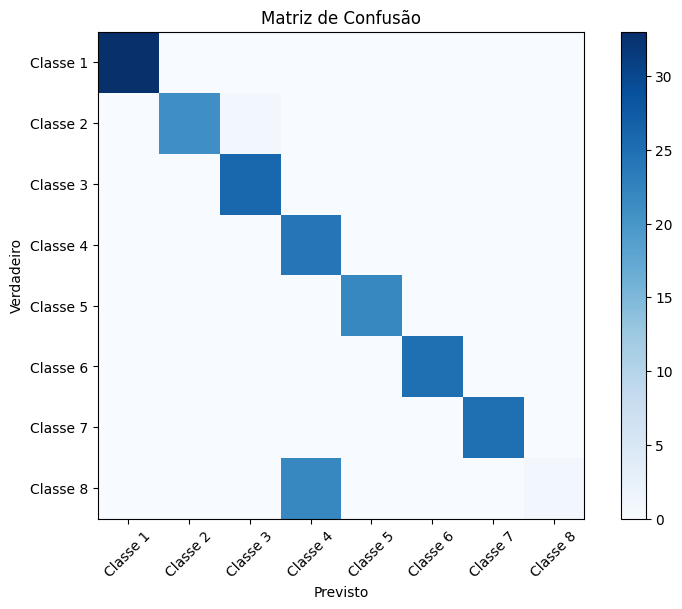

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# Gráfico de dispersão dos dados de validação
plt.figure(figsize=(10, 6))
for i in range(8):
    mask = (true_labels == i)
    plt.scatter(X_val[mask, 0], X_val[mask, 1], label=f'Classe {i+1}', alpha=0.5)

for i in range(8):
    mask = (predictions == i)
    plt.scatter(X_val[mask, 0], X_val[mask, 1], marker='x', color='black')

plt.title('Dados de Validação e Previsões da Rede Neural')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Matriz de confusão visualizada
plt.figure(figsize=(8, 6))
plt.imshow(confusion, cmap='Blues', interpolation='nearest')
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(8)
plt.xticks(tick_marks, [f'Classe {i+1}' for i in range(8)], rotation=45)
plt.yticks(tick_marks, [f'Classe {i+1}' for i in range(8)])
plt.tight_layout()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()


In [ ]:
import numpy as np

# Função de ativação e sua derivada
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Gerar dados aleatórios
np.random.seed(42)
n_samples = 1000
data = np.random.rand(n_samples, 2) * 2 - 1  # valores entre -1 e 1
labels = []

for x, y in data:
    if abs(x) + abs(y) < 1:  # dentro do losango
        if x > 0 and y > 0:
            labels.append(0)  # C1
        elif x < 0 and y > 0:
            labels.append(1)  # C2
        elif x < 0 and y < 0:
            labels.append(2)  # C3
        else:
            labels.append(3)  # C4
    else:  # fora do losango, mas dentro do círculo
        if x > 0 and y > 0:
            labels.append(4)
        elif x < 0 and y > 0:
            labels.append(5)
        elif x < 0 and y < 0:
            labels.append(6)
        else:
            labels.append(7)

labels = np.array(labels).reshape(-1, 1)

# One-hot encoding das labels
one_hot_labels = np.zeros((n_samples, 8))
for i in range(n_samples):
    one_hot_labels[i, labels[i]] = 1

# Dividir os dados em treinamento e validação
split = int(0.8 * n_samples)
X_train, X_val = data[:split], data[split:]
y_train, y_val = one_hot_labels[:split], one_hot_labels[split:]

# Parâmetros da rede
input_size = 2
hidden_size = 64
output_size = 8
lr = 0.01
epochs = 5000

# Inicialização dos pesos e biases
w1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
w2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Termo do momento
momentum = 0.9
dw1_prev = 0
dw2_prev = 0
db1_prev = 0
db2_prev = 0

for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X_train, w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)

    # Backward pass
    loss = y_train - a2
    dz2 = loss * sigmoid_derivative(a2)
    dw2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0)
    dz1 = np.dot(dz2, w2.T) * sigmoid_derivative(a1)
    dw1 = np.dot(X_train.T, dz1)
    db1 = np.sum(dz1, axis=0)

    # Atualização dos pesos e biases com termo do momento
    dw1 = lr * dw1 + momentum * dw1_prev
    db1 = lr * db1 + momentum * db1_prev
    dw2 = lr * dw2 + momentum * dw2_prev
    db2 = lr * db2 + momentum * db2_prev

    w1 += dw1
    b1 += db1
    w2 += dw2
    b2 += db2

    dw1_prev = dw1
    db1_prev = db1
    dw2_prev = dw2
    db2_prev = db2

# Avaliação
z1_val = np.dot(X_val, w1) + b1
a1_val = sigmoid(z1_val)
z2_val = np.dot(a1_val, w2) + b2
a2_val = sigmoid(z2_val)

predictions = np.argmax(a2_val, axis=1)
true_labels = np.argmax(y_val, axis=1)

# Matriz de confusão
confusion = np.zeros((8, 8))
for i in range(len(predictions)):
    confusion[true_labels[i], predictions[i]] += 1

print("Matriz de Confusão:")
print(confusion)


Matriz de Confusão:
[[13.  0.  4.  0. 16.  0.  0.  0.]
 [ 2.  0. 20.  0.  0.  0.  0.  0.]
 [ 0.  0. 26.  0.  0.  0.  0.  0.]
 [ 0.  0. 21.  0.  3.  0.  0.  0.]
 [ 0.  0.  0.  0. 22.  0.  0.  0.]
 [25.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 15.  0.  0. 10.  0.  0.]
 [ 4.  0. 18.  0.  1.  0.  0.  0.]]


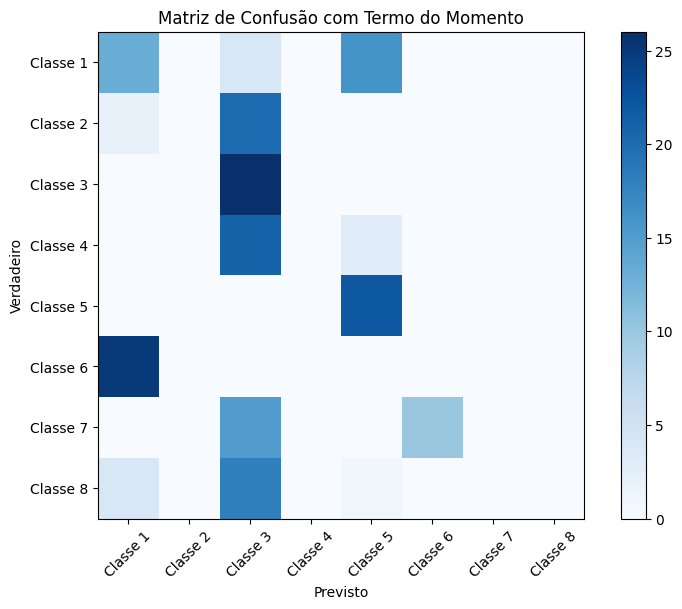

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# Matriz de confusão visualizada
plt.figure(figsize=(8, 6))
plt.imshow(confusion, cmap='Blues', interpolation='nearest')
plt.title('Matriz de Confusão com Termo do Momento')
plt.colorbar()
tick_marks = np.arange(8)
plt.xticks(tick_marks, [f'Classe {i+1}' for i in range(8)], rotation=45)
plt.yticks(tick_marks, [f'Classe {i+1}' for i in range(8)])
plt.tight_layout()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()


Questão 4)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Definindo a função da série temporal
def time_series(n):
    return np.sin(n**2) + np.cos(n + np.cos(n))

# Gerando os dados
n = np.arange(0, 50, 0.1)
x = time_series(n)

# Preparando os dados
X = []
y = []

for i in range(len(x) - 13):
    X.append(x[i:i+10])
    y.append(x[i+10:i+13])

X = np.array(X)
y = np.array(y)

# Dividindo os dados em treinamento e teste (80% treino, 20% teste)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Construindo o modelo
model = keras.Sequential([
    keras.layers.Dense(50, activation='relu', input_shape=(10,)),
    keras.layers.Dense(3)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Avaliando o modelo
errors = model.evaluate(X_test, y_test)
print(f"Erro médio quadrático: {errors}")

# Fazendo previsões
x_input = x[-10:].reshape(1, -1)
predictions = model.predict(x_input)
print(f"Previsões para x(n+1), x(n+2) e x(n+3): {predictions[0]}")


Epoch 1/50
13/13 [==============================] - 1s 13ms/step - loss: 1.1618 - val_loss: 1.0980
Epoch 2/50
13/13 [==============================] - 0s 4ms/step - loss: 0.9529 - val_loss: 0.9191
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 0.8407 - val_loss: 0.8234
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 0.7817 - val_loss: 0.7712
Epoch 5/50
13/13 [==============================] - 0s 8ms/step - loss: 0.7462 - val_loss: 0.7332
Epoch 6/50
13/13 [==============================] - 0s 7ms/step - loss: 0.7179 - val_loss: 0.7077
Epoch 7/50
13/13 [==============================] - 0s 7ms/step - loss: 0.6932 - val_loss: 0.6861
Epoch 8/50
13/13 [==============================] - 0s 9ms/step - loss: 0.6738 - val_loss: 0.6671
Epoch 9/50
13/13 [==============================] - 0s 6ms/step - loss: 0.6532 - val_loss: 0.6514
Epoch 10/50
13/13 [==============================] - 0s 7ms/step - loss: 0.6364 - val_loss: 0.6337
Epoch 11/50
13/13 

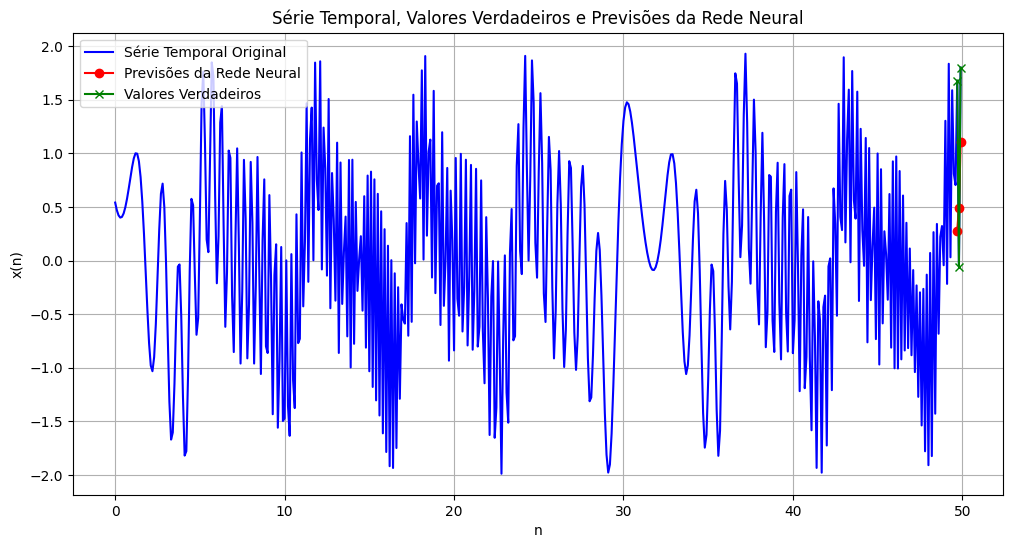

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a função da série temporal
def time_series(n):
    return np.sin(n**2) + np.cos(n + np.cos(n))

# Gerando os dados
n = np.arange(0, 50, 0.1)
x = time_series(n)

# Plotando a série temporal original
plt.figure(figsize=(12, 6))
plt.plot(n, x, label='Série Temporal Original', color='blue')

# Gerando as previsões da rede neural
predicted_values = [0.27961218, 0.4929461, 1.1006732]
n_future = np.arange(49.7, 50, 0.1)
plt.plot(n_future, predicted_values, label='Previsões da Rede Neural', color='red', marker='o')

# Plotando os valores verdadeiros
true_values = x[-3:]
plt.plot(n_future, true_values, label='Valores Verdadeiros', color='green', marker='x')

plt.title('Série Temporal, Valores Verdadeiros e Previsões da Rede Neural')
plt.xlabel('n')
plt.ylabel('x(n)')
plt.legend()
plt.grid(True)
plt.show()


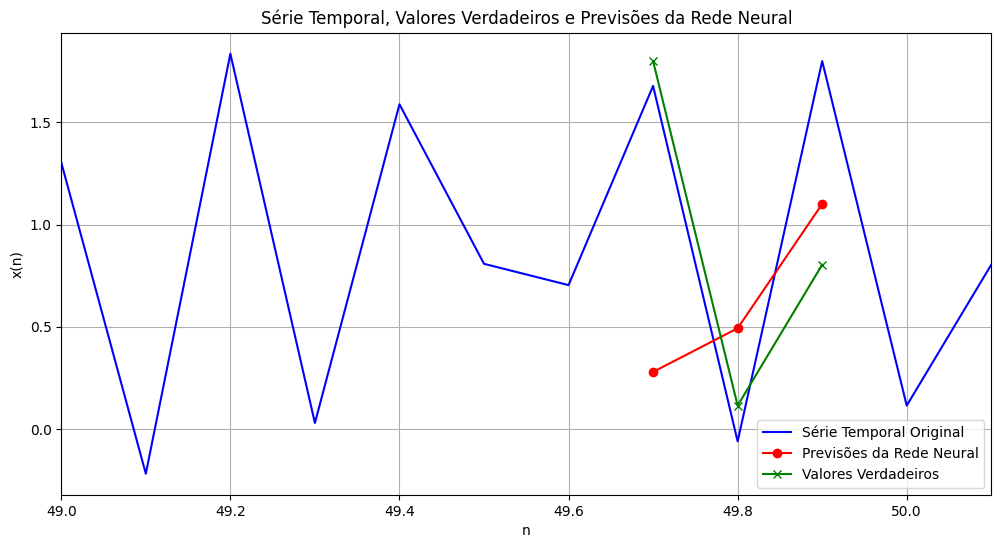

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a função da série temporal
def time_series(n):
    return np.sin(n**2) + np.cos(n + np.cos(n))

# Gerando os dados
n = np.arange(49, 50.1, 0.1)  # Ajustando o intervalo para [49, 50.1]
x = time_series(n)

# Plotando a série temporal original
plt.figure(figsize=(12, 6))
plt.plot(n, x, label='Série Temporal Original', color='blue')

# Gerando as previsões da rede neural
predicted_values = [0.27961218, 0.4929461, 1.1006732]
n_future = np.arange(49.7, 50, 0.1)
plt.plot(n_future, predicted_values, label='Previsões da Rede Neural', color='red', marker='o')

# Plotando os valores verdadeiros
true_values = x[-3:]
plt.plot(n_future, true_values, label='Valores Verdadeiros', color='green', marker='x')

plt.title('Série Temporal, Valores Verdadeiros e Previsões da Rede Neural')
plt.xlabel('n')
plt.ylabel('x(n)')
plt.legend()
plt.grid(True)
plt.xlim(49, 50.1)  # Limitando o eixo x para mostrar apenas os valores desejados
plt.show()
